# Machine Learning II

<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/ml0/MachineLearning/Machine_Learning_II.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<p>Recordá abrir en una nueva pestaña</p>

En esta clase veremos:

- Práctica de Clasificación 
- Modelos de Ensambles:
  - Voting, Bagging, Boosting
- Feature Importances
- Clustering 
- Reducción de dimensionalidad
- Sentiment Analysis con Transformers

In [296]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [297]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

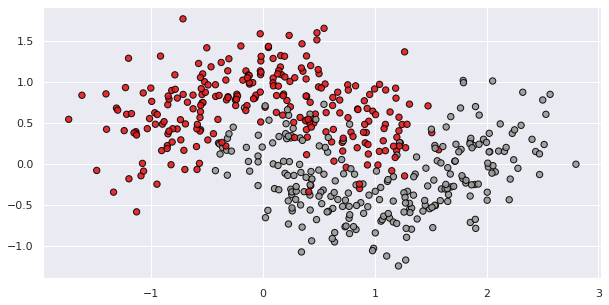

In [298]:
fig, ax = plt.subplots(figsize=(10,5))
sctr = ax.scatter(X[:,0],X[:,1], c=y, edgecolor='black', s=40, alpha=0.9,
                 cmap=plt.cm.Set1)

Ejercicio:

- Ajustar LogisticRegression, RandomForestClassifier y SVC a los datos y evaluar el accuracy

In [299]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Completar
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)])

In [300]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,...
                                        

In [301]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


# Bagging ensembles

Bagging proviene de _Bootstrap Aggregating_: se entrena un modelo tomando muestras con reposición.

In [302]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [303]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [304]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


Visualicemos las fronteras de decisión:

In [307]:
#@title Ploteo
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

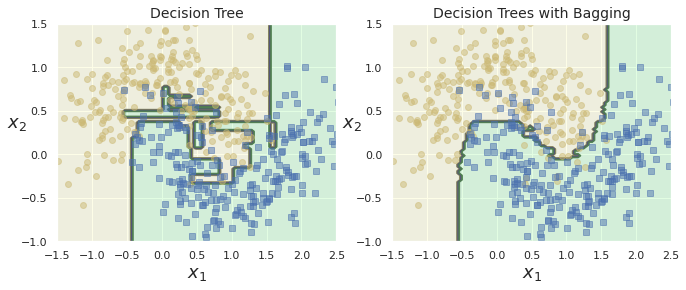

In [308]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

# Random Forests

In [309]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

In [310]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [311]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [313]:
# Muy parecido
np.sum(y_pred == y_pred_rf) / len(y_pred)

0.976

# Importancia de los features

Para este ejemplo usamos el dataset de [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) 

In [319]:
from sklearn.datasets import load_iris
X = load_iris().data
y = load_iris().target
print ('X dimensions: ', X.shape)
print ('y dimensions: ', y.shape)

X dimensions:  (150, 4)
y dimensions:  (150,)


In [356]:
iris['feature_names'], iris['target_names'].tolist()

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 ['setosa', 'versicolor', 'virginica'])

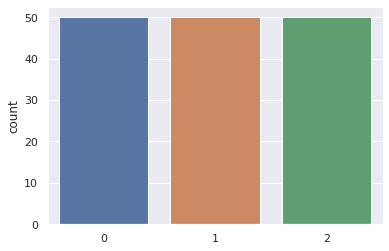

In [357]:
sns.countplot(x=y);

In [320]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [358]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [340]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


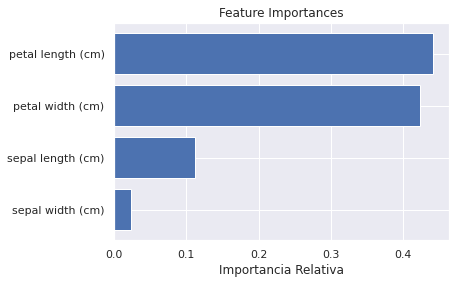

In [341]:
features = iris['feature_names']
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()

### Ejercicio:

- Separar en Train y Test
- Ajustar un Clasificador KNN
- Medir el accuracy en Test

In [342]:
# Completar

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## k Nearest Neighbor

In [343]:
# Completar
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [344]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [345]:
np.mean(y_pred == y_test)

0.98

In [352]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

[Matriz de errores o *confusión*](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


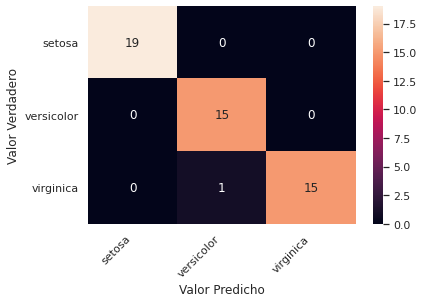

In [360]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print(cm)

heatmap = sns.heatmap(cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(iris['target_names'], rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(iris['target_names'], rotation=45, ha='right')
plt.ylabel('Valor Verdadero')
plt.xlabel('Valor Predicho');

## Regresión Logística

Ajustar una regresión logística a Iris

In [367]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=150)
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [368]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [373]:
np.mean(y_pred == y_test)

1.0

## Cross Validation

¿Cómo sabemos que nuestra métrica no dio tan bien de casualidad?

Ejercicio:
  - Usar "cross_val_score" para estimar la generalización del modelo

In [377]:
# Completar

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train, cv=5)

In [378]:
scores

array([1.  , 0.85, 0.95, 1.  , 0.95])

In [379]:
np.mean(scores)

0.95

## Twitter

Vamos a cerrar con un caso más entretenido: el estado del arte para procesamiento de lenguaje en Twitter.

In [ ]:
# Instalamos twint para bajar tweets
!pip3 install --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint
!pip3 install --upgrade aiohttp_socks

In [ ]:
!pip install tweet-preprocessor
import preprocessor as p
import pandas as pd

In [ ]:
# Hay que reiniciar la colab. Luego de eso, importamos
import twint
import nest_asyncio
nest_asyncio.apply()

In [ ]:
# Descargamos 10000 tweets del World Economic Forum
user = 'wef'
n = 10000

c = twint.Config()
c.Username = user
c.Hide_output = True  
c.Pandas = True
c.Limit = n
twint.run.Search(c)

In [ ]:
twint.output.panda.Tweets_df.sample(1)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
378,1331349410647826435,1331349410647826435,1.606253e+12,2020-11-24 21:30:09,+0000,,Greenland's ice sheet could melt at a rate not...,en,[climatechange],[],5120691,5120691,wef,World Economic Forum,2,21,https://twitter.com/wef/status/133134941064782...,[https://bit.ly/2HwnUmw],[https://pbs.twimg.com/media/EnnnO2hXMAIvQLb.png],1,https://pbs.twimg.com/media/EnnnO2hXMAIvQLb.png,False,84,23,51,,None,,,,,,,[],,,,


In [ ]:
tweets = twint.output.panda.Tweets_df[['date', 'tweet', 'hashtags']]

In [381]:
#@title Descargar csv a local

tweets.to_csv('wef.csv')
from google.colab import files
files.download('wef.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [432]:
tweets = pd.read_csv('wef_40000.csv', index_col=0)
tweets = tweets.dropna(subset=['tweet'])

In [433]:
tweets.shape

(40000, 3)

In [434]:
tweets['tweet'] = tweets.apply(lambda x: p.clean(x['tweet']), axis=1)

In [435]:
# Por tweets iguales con distintas URLs
tweets = tweets.drop_duplicates('tweet')
tweets.shape

(14869, 3)

In [436]:
tweets = tweets.loc[(tweets['tweet'].str.len() > 1), :]
tweets.shape

(14866, 3)

In [404]:
tweets.sample(1)

,date,tweet,hashtags
11381,2020-03-15 02:00:21,India dominates the list of the worlds most po...,"['globalwarming', 'carbonemissions']"


# NLTK

In [164]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

lemma = nltk.wordnet.WordNetLemmatizer()

class LemmaTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaTfidfVectorizer, self).build_analyzer()
        return lambda doc: [lemma.lemmatize(w) for w in analyzer(doc)]

In [405]:
%%time
vectorizer = LemmaTfidfVectorizer(stop_words='english')

X = vectorizer.fit_transform(tweets['tweet'])

CPU times: user 760 ms, sys: 353 µs, total: 760 ms
Wall time: 764 ms


In [406]:
X.shape

(14866, 9673)

### Topic modelling con K-Means 

Ejercicio:

- Ajustar KMeans a la matriz de features

In [407]:
from sklearn.cluster import KMeans
from sklearn import metrics

n_clusters = 9
km = KMeans(n_clusters=n_clusters, init='k-means++')
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [408]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Silhouette Coefficient: 0.011


In [409]:
centroides_ordenados = km.cluster_centers_.argsort()[:, ::-1]
vocab = vectorizer.get_feature_names()

for i in range(n_clusters):
    print("\nCluster número %d:" % i)
    for ind in centroides_ordenados[i, :10]:
        print('%s ' % vocab[ind], end='')


Cluster número 0:
need new global future coronavirus people country help live say 
Cluster número 1:
world forum economic best country economy city read biggest largest 
Cluster número 2:
learn day future quote world global impact coronavirus food city 
Cluster número 3:
read future new people day million book life just time 
Cluster número 4:
best way davos country work future city make economy global 
Cluster número 5:
plastic waste pollution ocean learn problem ban bag bottle use 
Cluster número 6:
change climate fight world need tackle read way learn new 
Cluster número 7:
covid 19 pandemic vaccine global need know world recovery response 
Cluster número 8:
year read million old ago learn world new billion record 

Ejercicio:

 - Ajustar MiniBatchKMeans en lugar de KMeans
 - Encontrar el mejor número de clusters según el índice Silhouette

# Reducción de Dimensionalidad

Ejercicio:

- Reducir la matriz X (del TF-IDF Vectorizer) a 3 dimensiones con PCA

In [410]:
from sklearn.decomposition import PCA

# Completar
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(X.toarray())

In [411]:
reduced_features.shape

(14866, 3)

In [412]:
# Generamos una lista de colores
palette = sns.color_palette("GnBu_d", n_colors=max(km.labels_) + 1).as_hex()

In [413]:
# Armamos un DataFrame con la información para graficar
coords = pd.DataFrame(data = reduced_features, columns = ['x', 'y','z'], index = tweets['tweet'].index)
coords['text'] = tweets['tweet']
coords['color'] = [palette[i] for i in km.labels_]
coords['cluster'] = km.labels_

In [414]:
coords.sample(1)

,x,y,z,text,color,cluster
11182,-0.00055,-0.040887,-0.056834,Staying in is the new going out. This is how t...,#70bec5,2


In [415]:
coords = coords.sample(1000)

In [420]:
import plotly.graph_objects as go

fig = go.Figure()

for c in range(n_clusters):
  fig.add_trace(go.Scatter3d( x = coords[coords.cluster == c]['x'],
                                y = coords[coords.cluster == c]['y'],
                                z = coords[coords.cluster == c]['z'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(c), marker_color=palette[c], 
                                text=coords[coords.cluster == c]['text'], hoverinfo='text'))

fig.update_layout(width = 800, height = 800, autosize = True, showlegend = True)

Ejercicio (extra):
  - Hacer que los labels sean las 2 palabras más importantes del cluster

## Sentiment Analysis *state of the art*

Tomamos solo tweets de un tema

In [421]:
terminos = ['climate', 'emissions', 'environment', 'nature', 'forest']

# tweets['climate'] = tweets['hashtags'].str.join(' ').str.contains('|'.join(terminos)).astype(int)
tweets['climate'] = tweets['hashtags'].str.contains('|'.join(terminos)).astype(int)

In [422]:
climate_tweets = tweets[tweets['climate'] == 1]
climate_tweets.shape

(1860, 4)

In [423]:
climate_tweets.sample(2)

,date,tweet,hashtags,climate
21696,2019-07-06 18:30:15,How businesses can tackle the plastics problem,"['environment', 'waste']",1
24732,2019-04-22 14:15:07,This -year-old built an underwater robot to fi...,['environment'],1


## Modelos Transformers

In [ ]:
!pip install transformers
from transformers import pipeline

In [ ]:
nlp_token_class = pipeline('fill-mask')
nlp_token_class('The IADB is an organization dedicated to <mask>')

Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['lm_head.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[{'score': 0.09348928183317184,
  'sequence': '<s>The IADB is an organization dedicated to diversity</s>',
  'token': 5845,
  'token_str': 'Ġdiversity'},
 {'score': 0.08397325873374939,
  'sequence': '<s>The IADB is an organization dedicated to sustainability</s>',
  'token': 11128,
  'token_str': 'Ġsustainability'},
 {'score': 0.06618712842464447,
  'sequence': '<s>The IADB is an organization dedicated to transparency</s>',
  'token': 7218,
  'token_str': 'Ġtransparency'},
 {'score': 0.05612495541572571,
  'sequence': '<s>The IADB is an organization dedicated to education</s>',
  'token': 1265,
  'token_str': 'Ġeducation'},
 {'score': 0.03639939799904823,
  'sequence': '<s>The IADB is an organization dedicated to equality</s>',
  'token': 9057,
  'token_str': 'Ġequality'}]

In [ ]:
zero_shot_classifier = pipeline("zero-shot-classification")
results = zero_shot_classifier(
  "Python is the best language for data science", 
  ["IT issue", "Price request", "Datetime query", "Recommendation"]
)

In [ ]:
scores = results["scores"]
clases = results["labels"]
best_idx = np.argmax(scores)
predicted_class = clases[best_idx]

results

{'labels': ['Recommendation', 'Price request', 'Datetime query', 'IT issue'],
 'scores': [0.6116954684257507,
  0.21276579797267914,
  0.1155816987156868,
  0.0599571168422699],
 'sequence': 'Python is the best language for data science'}

## Ejercicio

- Aplicar el pipeline de Sentiment Analysis a los tweets de clima
- Contar proporción de positivos y negativos
- Aplicar Zero-Shot Classification para extraer tweets de alguna categoría de interés

Recursos

- https://github.com/charlesmalafosse/open-dataset-for-sentiment-analysis
- https://scikit-learn.org/stable/
- https://huggingface.co/transformers/
- https://github.com/a-martyn/ISL-python
- https://jakevdp.github.io/PythonDataScienceHandbook